In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hydroeval as he
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

print("--- Starting ARIMA Baseline Model ---")

# =================================================================
# 1. LOAD THE MASTER, CLEANED DATASET
# =================================================================
df = pd.read_csv('../data/processed/model_ready_data.csv', index_col='date', parse_dates=True)

# For a simple ARIMA, we only need our target variable
ts_data = df['discharge']


# =================================================================
# 2. SPLIT DATA INTO TRAINING AND TESTING SETS
# =================================================================
split_date = '2005-01-01'
train_data = ts_data.loc[ts_data.index < split_date]
test_data = ts_data.loc[ts_data.index >= split_date]
print(f"Data successfully split. Training samples: {len(train_data)}, Testing samples: {len(test_data)}")

--- Starting ARIMA Baseline Model ---
Data successfully split. Training samples: 8737, Testing samples: 782


In [2]:
# =================================================================
# 3. INITIALIZE AND TRAIN THE MODEL
# =================================================================
# Define the ARIMA model with parameters (p,d,q)
model_arima = ARIMA(train_data, order=(5, 1, 1))

print("Training the ARIMA model... This may take a few minutes.")
# Fit the model to the training data
arima_results = model_arima.fit()
print("✅ Training complete!")

# Print a summary of the model
print(arima_results.summary())

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Training the ARIMA model... This may take a few minutes.
✅ Training complete!
                               SARIMAX Results                                
Dep. Variable:              discharge   No. Observations:                 8737
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -51626.251
Date:                Wed, 15 Oct 2025   AIC                         103266.502
Time:                        16:50:17   BIC                         103316.028
Sample:                    01-30-1981   HQIC                        103283.380
                         - 12-31-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5599      0.059      9.486      0.000       0.444       0.676
ar.L2          0.1187      0.012      9.581      0.00

Making forecasts for the test period...

--- ARIMA Model Performance Metrics ---
Root Mean Square Error (RMSE): 1196.84 m³/s
Mean Absolute Error (MAE): 1169.09 m³/s
R-squared (R²): -21.00
Nash-Sutcliffe Efficiency (NSE): -21.00


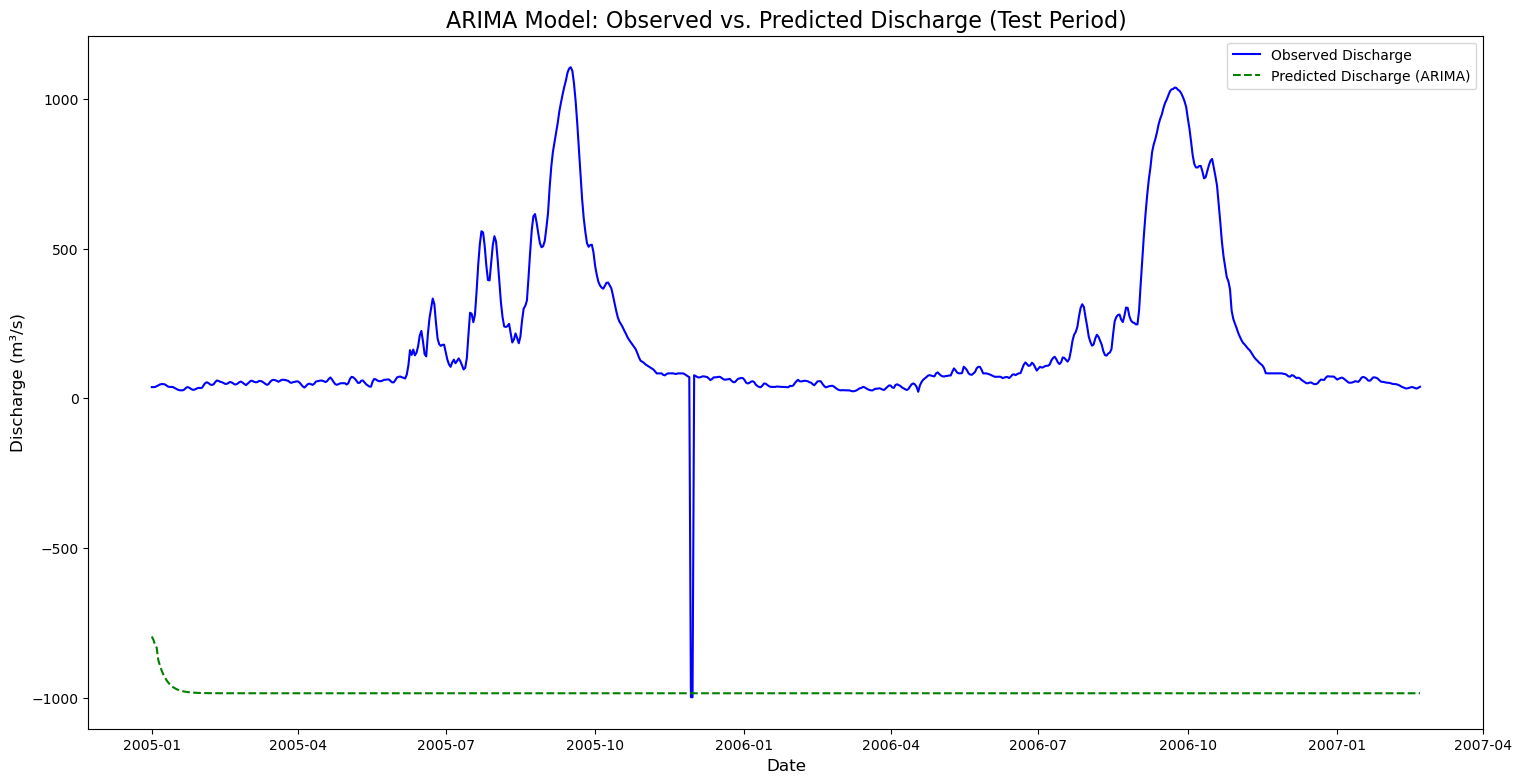

In [5]:
# =================================================================
# 4. MAKE PREDICTIONS AND EVALUATE
# =================================================================
print("Making forecasts for the test period...")
# Forecast the same number of steps as the length of our test set
y_pred_arima = arima_results.forecast(steps=len(test_data))

# Create a results DataFrame
results_arima = pd.DataFrame({
    'Observed': test_data,
    'Predicted_ARIMA': y_pred_arima
})

# Calculate metrics
rmse = np.sqrt(mean_squared_error(results_arima['Observed'], results_arima['Predicted_ARIMA']))
mae = mean_absolute_error(results_arima['Observed'], results_arima['Predicted_ARIMA'])
r2 = r2_score(results_arima['Observed'], results_arima['Predicted_ARIMA'])
nse = he.evaluator(he.nse, results_arima['Predicted_ARIMA'], results_arima['Observed'])[0]

# Print the results
print("\n--- ARIMA Model Performance Metrics ---")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} m³/s")
print(f"Mean Absolute Error (MAE): {mae:.2f} m³/s")
print(f"R-squared (R²): {r2:.2f}")
print(f"Nash-Sutcliffe Efficiency (NSE): {nse:.2f}")

# =================================================================
# 5. VISUALIZE THE RESULTS
# =================================================================
plt.figure(figsize=(18, 9))
plt.plot(results_arima.index, results_arima['Observed'], label='Observed Discharge', color='blue')
plt.plot(results_arima.index, results_arima['Predicted_ARIMA'], label='Predicted Discharge (ARIMA)', color='green', linestyle='--')
plt.title('ARIMA Model: Observed vs. Predicted Discharge (Test Period)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.show()